In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')


In [2]:
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [3]:
from ESN import Reservoir
reservoir = Reservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True)

In [4]:
reservoir.LCE(X_TR)


c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:142: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-2.61541

In [5]:
reservoir.de_fi()

0.0462834597453736

In [6]:
from IntrinsicPlasticity import IPMask

In [7]:
from IPReservoir import IPReservoir
ip_reservoir = IPReservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True, mask=IPMask.normalMask(30))

In [8]:
ip_reservoir.pre_train(X_TR, epochs=10)

- Epoch: 1) | KL Divergence value: 2483.97509765625.
- Epoch: 2) | KL Divergence value: 2412.099365234375.
- Epoch: 3) | KL Divergence value: 2343.430908203125.
- Epoch: 4) | KL Divergence value: 2277.8037109375.
- Epoch: 5) | KL Divergence value: 2215.621337890625.
- Epoch: 6) | KL Divergence value: 2157.5966796875.
- Epoch: 7) | KL Divergence value: 2104.5341796875.
- Epoch: 8) | KL Divergence value: 2057.11083984375.
- Epoch: 9) | KL Divergence value: 2015.6964111328125.
- Epoch: 10) | KL Divergence value: 1980.286376953125.


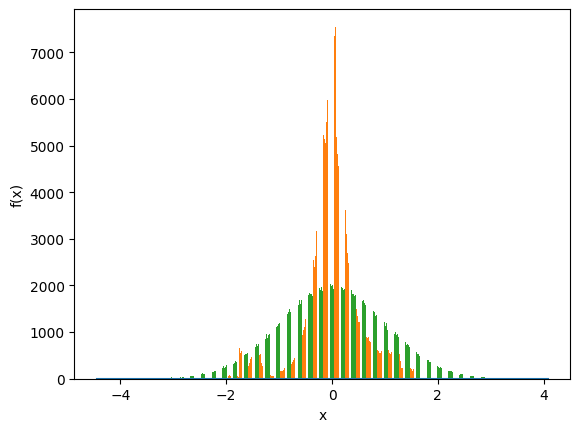

In [9]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [10]:
ip_reservoir.LCE(X_VAL)

c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:142: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-0.68085337

In [11]:
ip_reservoir.LCE(X_TS)

-0.6808524

In [12]:
ip_reservoir.LCE(X_TR)

-0.6809389

In [13]:
ip_reservoir.de_fi()

0.08078333675313475